__Cuaderno de trabajo de:__ Nombre Apellido

# Pandas

Antes de poder hacer estadística descriptiva, o inferencia estadística, es necesario recolectar los datos, y es muy conveniente cargarlos en el ordenador en un formato adecuado.
También es importante *inspeccionar* y *previsualizar* esos datos para detectar posibles errores en los propios datos o en alguna de las fases del proceso de recolección.

`pandas` es una librería de python cuyo objetivo es ayudar en estas fases previas al análisis estadístico, para simplificar el trabajo posterior.

Para ello, `pandas` proporciona los `dataframes`, unas estructuras de datos bidimensionales, similares a las tablas de una hoja de cálculo, fáciles de usar y de alto rendimiento.

## Creación de dataframes

Podemos crear un dataframe a partir de varias Series: cada una actuará a modo de registro en nuestra tabla. Por ejemplo, crearemos una tabla con tres registros y cuyas columnas sean `Cost`, `Item Purchased` y `Name`:

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [143]:
compra_01 = pd.Series({'Nombre': 'Homer',
                        'Artículo': 'Rosquillas',
                        'Precio': 3.70})
compra_02 =  pd.Series({'Nombre': 'Barney',
                        'Artículo': 'Cerveza duff',
                        'Precio': 6.00})
compra_03 =  pd.Series({'Nombre': 'Lenny',
                        'Artículo': 'Leche',
                        'Precio': 4.50})

df = pd.DataFrame([compra_01, compra_02, compra_03], index=['Compra 01', 'Compra 02', 'Compra 03'])

Observamos que basta proporcionarle una serie por cada entrada en nuestra tabla. Además, los campos de la Serie deben ser los mismos a lo largo de cada registro, con el fin de que se pueda formar correctamente la tabla.
El argumento index sirve para introducir identificadores a cada registro. Por defecto será un número entero, pero en este caso hemos utilizado strings.

In [144]:
df.head()

,Nombre,Artículo,Precio
Compra 01,Homer,Rosquillas,3.7
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


Para seleccionar una columna

In [145]:
df['Precio']

Compra 01    3.7
Compra 02    6.0
Compra 03    4.5
Name: Precio, dtype: float64

Para seleccionar un subconjunto de registros conociendo su índice, podemos utilizar `loc`

In [146]:
df.loc['Compra 02']

Nombre            Barney
Artículo    Cerveza duff
Precio               6.0
Name: Compra 02, dtype: object

In [147]:
type(df['Precio'])

pandas.core.series.Series

In [148]:
df.loc['Compra 01']['Precio']

3.7

In [149]:
df.loc['Compra 01', 'Precio']

3.7

In [150]:
type(df.loc['Compra 01', 'Precio'])

numpy.float64

A su vez, estos argumentos pueden ser dataframes

In [151]:
df.loc[['Compra 01', 'Compra 02']]

,Nombre,Artículo,Precio
Compra 01,Homer,Rosquillas,3.7
Compra 02,Barney,Cerveza duff,6.0


In [152]:
type(df.loc[['Compra 01', 'Compra 02']])

pandas.core.frame.DataFrame

In [153]:
df[['Precio','Nombre']].loc[['Compra 01', 'Compra 02']]

,Precio,Nombre
Compra 01,3.7,Homer
Compra 02,6.0,Barney


In [154]:
df.loc[['Compra 01', 'Compra 02']][['Precio','Nombre']]

,Precio,Nombre
Compra 01,3.7,Homer
Compra 02,6.0,Barney


Si quisieramos acceder utilizando las posiciones (como enteros), podemos usar `iloc`.
Por ejemplo, el siguiente comando toma las dos primeras filas y todas las columnas

In [155]:
df

,Nombre,Artículo,Precio
Compra 01,Homer,Rosquillas,3.7
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


In [156]:
df.iloc[1:]

,Nombre,Artículo,Precio
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


In [157]:
df.iloc[:2,:2]

,Nombre,Artículo
Compra 01,Homer,Rosquillas
Compra 02,Barney,Cerveza duff


In [158]:
df[:2]

,Nombre,Artículo,Precio
Compra 01,Homer,Rosquillas,3.7
Compra 02,Barney,Cerveza duff,6.0


<br>
Si queremos borrar algún registro conociendo su índice, basta usar `drop`

In [159]:
df2=df.drop('Compra 01')

In [160]:
df2

,Nombre,Artículo,Precio
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


In [161]:
#Atención: df sigue igual que antes
df

,Nombre,Artículo,Precio
Compra 01,Homer,Rosquillas,3.7
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


El comando `drop`, por defecto, crea una copia con el nuevo dataframe actualizado. En lugar de `df2 = df.drop(...)` podemos hacer lo siguiente para que la actualización se realice en el mismo lugar de memoria del objeto `df`

```python
df.drop('Compra 01', inplace=True)
```

> **pandas suele devolver un nuevo DataFrame, sin modificar el DataFrame original**

In [162]:
df.drop('Compra 01', inplace=True)
df

,Nombre,Artículo,Precio
Compra 02,Barney,Cerveza duff,6.0
Compra 03,Lenny,Leche,4.5


### Otra forma de crear DataFrames

Podemos pasar a ``pd.DataFrame`` como argumento un diccionario, donde las claves del diccionario son los nombres de las columnas y los valores son listas con los datos.
*Todas las listas deben tener la misma longitud.*

In [163]:
df = pd.DataFrame(data = {
    "Cálculo": [10,5,8,7],
    "Álgebra": [8,7,6,5],
    },
    index = ["Jaimita", "Fulano", "Mengano", "Zutanita"],
)
df

,Cálculo,Álgebra
Jaimita,10,8
Fulano,5,7
Mengano,8,6
Zutanita,7,5


In [164]:
labels = ['a','c','c']
print(type(labels))        #<class 'list'>

my_data = [10,20,30]
print(type(my_data))       #<class 'list'>

arr = np.array(my_data)
print(type(arr))           #<class 'numpy.ndarray'>

d={'a':10,'b':20,'c':30}
print(type(d))             #<class 'dict'>

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'dict'>


In [165]:
pd.Series(data = my_data, index = labels)

a    10
c    20
c    30
dtype: int64

In [166]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [167]:
ser1 = pd.Series([1,2,3,4],['USA','GER','IT','ES'])
ser2 = pd.Series([1,2,3,4],['ES','USA','GER','FR'])
print(ser1)
print(ser2)

USA    1
GER    2
IT     3
ES     4
dtype: int64
ES     1
USA    2
GER    3
FR     4
dtype: int64


In [168]:
ser1+ser2  

ES     5.0
FR     NaN
GER    5.0
IT     NaN
USA    3.0
dtype: float64

In [169]:
ser2[0]

1

In [170]:
ser2['USA']

2

In [171]:
df = pd.DataFrame([ser1,ser2])
df

,USA,GER,IT,ES,FR
0,1.0,2.0,3.0,4.0,NaN
1,2.0,3.0,NaN,1.0,4.0


In [172]:
df2 = pd.DataFrame([ser1,ser2],index=[1991,1992])
df2

,USA,GER,IT,ES,FR
1991,1.0,2.0,3.0,4.0,NaN
1992,2.0,3.0,NaN,1.0,4.0


In [173]:
from numpy.random import randn
np.random.seed(101) #si mantienes la semilla tenemos los mismos números aleatorios
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [174]:
df['new']=df['W']+df['X']
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.334983
B,0.651118,-0.319318,-0.848077,0.605965,0.331800
C,-2.018168,0.740122,0.528813,-0.589001,-1.278046
D,0.188695,-0.758872,-0.933237,0.955057,-0.570177
E,0.190794,1.978757,2.605967,0.683509,2.169552


In [175]:
df.drop('new',axis=1) #axis =1 hace referencia a columnas, por defecto 0 filas

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [176]:
df #pero sigue...

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.334983
B,0.651118,-0.319318,-0.848077,0.605965,0.331800
C,-2.018168,0.740122,0.528813,-0.589001,-1.278046
D,0.188695,-0.758872,-0.933237,0.955057,-0.570177
E,0.190794,1.978757,2.605967,0.683509,2.169552


In [177]:
df.drop('new',axis=1, inplace=True) #inplace=True para aplicar cambios, por defecto false
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [178]:
df.drop('D',axis=0, inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


In [179]:
df.shape

(4, 4)

In [180]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [181]:
df.iloc[0]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [182]:
df.loc[['A','B'],['X','Y']]

,X,Y
A,0.628133,0.907969
B,-0.319318,-0.848077


In [183]:
df > 1 #muestra valores mayores que 1

,W,X,Y,Z
A,True,False,False,False
B,False,False,False,False
C,False,False,False,False
E,False,True,True,False


In [184]:
bool_df = df > 0
df[bool_df]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
E,0.190794,1.978757,2.605967,0.683509


In [185]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
E,0.190794,1.978757,2.605967,0.683509


In [186]:
resultado = df[df['W']>0]
resultado['X'] # si queremos una variable en concreto

A    0.628133
B   -0.319318
E    1.978757
Name: X, dtype: float64

In [187]:
 df[df['W']>0]['X'] #otra forma de escribirlo

A    0.628133
B   -0.319318
E    1.978757
Name: X, dtype: float64

In [188]:
 df[(df['W']>0) & (df['Y']<0)] #and

,W,X,Y,Z
B,0.651118,-0.319318,-0.848077,0.605965


In [189]:
 df[(df['W']<0) | (df['Y']>0)][['X','Z']]  #or

,X,Z
A,0.628133,0.503826
C,0.740122,-0.589001
E,1.978757,0.683509


In [190]:
df3 = pd.DataFrame({
    'a': [1.0, 2.0, 3.0, 4.0],
    'b': [0.1, 0.2, 0.3, 0.4],
})

df3.b = df3.b + 5.01
df3['c']=0 #primero se crea y luego...
df3.c=abs(df3.a*2-10)+df3.b
df3

,a,b,c
0,1.0,5.11,13.11
1,2.0,5.21,11.21
2,3.0,5.31,9.31
3,4.0,5.41,7.41


## Carga de dataframes

El trabajo normalmente no comienza con datos creados en el código, si no que éstos ya se encontrarán en archivos del disco duro. Pandas cuenta con funciones para leer el contenido de estos archivos, y volcarlos a un dataframe.

De todas formas es importante poder crear nuevos DataFrames a partir de los que leemos del disco duro.

Las funciones que se ocupan de esto comienzan por `pd.read_...`. Existen para documentos excel, html, json. Nosotros utilizaremos la más común, `pd.read_csv`, que lee del respectivo archivo .csv (cada fila es un registro de la tabla, y los valores están separados por comas).

In [191]:
#pd.read_csv?

A continuación cargaremos datos `tips.csv` en un `dataframe` de `pandas`. Esta base de datos, contiene información acerca de las cuentas de un restaurante. 

In [192]:
tips = pd.read_csv('cuentas.csv')

Además del nombre del archivo con los datos, `read_csv` tiene otros argumentos opcionales. Los más utilizados son:
    
* nrows: lee solo cierto número de filas (útil para hacer una prueba antes de procesar un archivo muy grande).
* usecols: el dataframe resultante solo tendrá estas columnas
* dtype: especifica el tipo de cada columna (por defecto, pandas trata de inferirlo automáticamente de los datos, pero a veces es necesario: por ejemplo para que lea un número como string en lugar de int).

## Análisis exploratorio

Una vez ya tenemos los datos cargados, podemos echarles un vistazo mediante las siguientes cuatro funciones: `head` y `tail` para observar las primeras y últimas filas, respectivamente, `describe` para obtener algunos estadísticos básicos, e `info` para obtener datos sobre los tipos

In [193]:
tips.head(10) #Entre paréntesis, el número de entradas que queremos mostrar. Por defecto,
            # este número es 5.

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
3,23.68,3.31,Hombre,No,Domingo,Comida,2
4,24.59,3.61,Mujer,No,Domingo,Comida,4
5,25.29,4.71,Hombre,No,Domingo,Comida,4
6,8.77,2.00,Hombre,No,Domingo,Comida,2
7,26.88,3.12,Hombre,No,Domingo,Comida,4
8,15.04,1.96,Hombre,No,Domingo,Comida,2
9,14.78,3.23,Hombre,No,Domingo,Comida,2


In [194]:
tips.tail(3)

,cuenta,propina,sex,fumador,día,hora,tamaño
241,22.67,2.00,Hombre,Yes,Sábado,Comida,2
242,17.82,1.75,Hombre,No,Sábado,Comida,2
243,18.78,3.00,Mujer,No,Jueves,Comida,2


In [195]:
tips.describe()

,cuenta,propina,tamaño
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Para datos de tipo numérico, `describe` proporciona información del número de valores no omitidos (count), la media, la desviación estándar, los valores mínimo y máximo y algunos cuantiles, entre ellos la mediana (50%).

En el caso de que la tabla contenga tanto datos numéricos como categóricos, `describe` por defecto solo muestra los estadísticos para las numéricas. Si queremos que también muestre los otros:

In [196]:
tips.describe(include='all')

,cuenta,propina,sex,fumador,día,hora,tamaño
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Hombre,No,Sábado,Comida,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Para las variables categóricas, se muestran los nuevos estadísticos de: número de valores únicos, valor más frecuente (top) y frecuencia de éste. Por ejemplo, para el caso del sexo, hay 244 anotaciones, y el valor más frecuente es Hombre (157 de 244), además de tener dos valores únicos (por lo que asumiremos que el otro valor es Mujer)

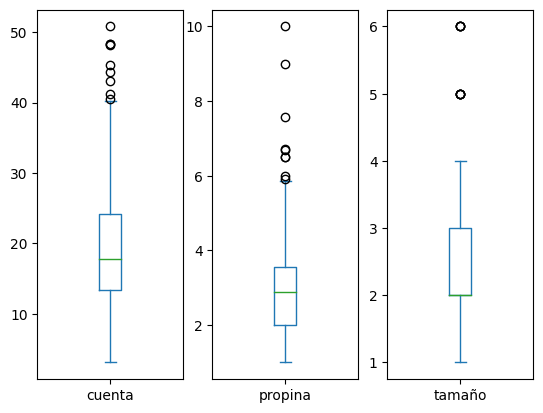

In [197]:
# podemos ver el diagrama de cajas que luego analizaremos
tips.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()

## Consultas de dataframes

Hasta ahora hemos visto como acceder a ciertos registros y/o ciertas columnas de nuestra tabla. Veremos ahora algunas funciones nuevas para realizar consultas más dinámicas.

Una forma rápida de acceder a una columna entera es

In [198]:
tips.head(2)

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3


In [199]:
tips[['propina', 'sex']].head(2)

,propina,sex
0,1.01,Mujer
1,1.66,Hombre


In [200]:
tips['cuenta'].head(10)

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: cuenta, dtype: float64

Si el nombre de la columna es un nombre de variable válido, tb se puede hacer:

In [201]:
tips.cuenta.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: cuenta, dtype: float64

Por supuesto dibujar gráficas es una buena forma de explorar los datos, y detectar si hemos importado los datos correctamente. La próxima semana trataremos este tema con más detalle, esta semana sólo dibujaremos **histogramas** y **scatter plots**.

<AxesSubplot: >

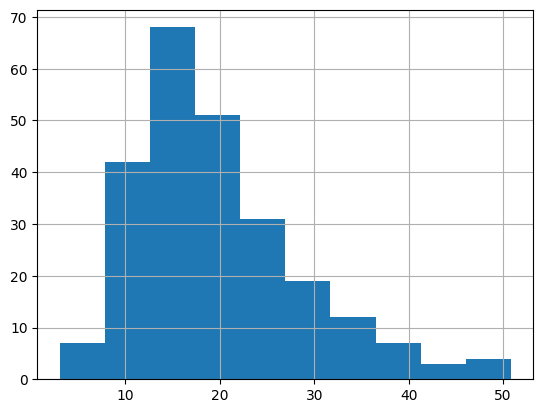

In [202]:
tips['cuenta'].hist()

<AxesSubplot: >

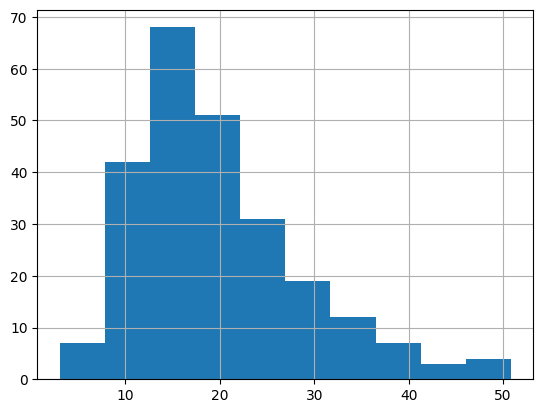

In [203]:
tips.cuenta.hist()

<AxesSubplot: xlabel='cuenta', ylabel='propina'>

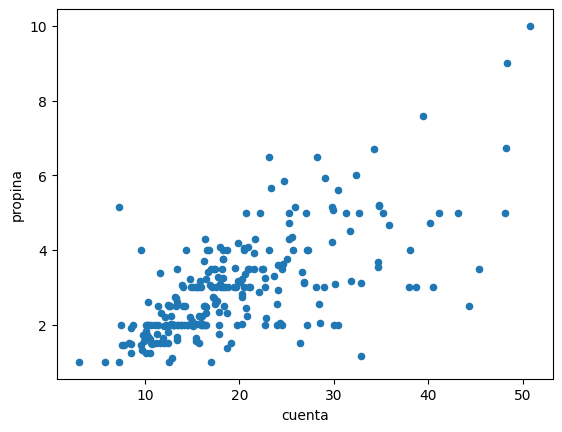

In [204]:
tips.plot.scatter('cuenta', 'propina')

Podemos utilizar una sintaxis muy similar a la de numpy para, por ejemplo, calcular la media o la mediana de una serie de datos:

In [205]:
tips['tamaño']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: tamaño, Length: 244, dtype: int64

In [206]:
tips['cuenta'].median()

17.795

In [207]:
tips['cuenta'].mean()

19.78594262295082

...o para encontrar los registros cuyo valor es mayor que la mediana

In [208]:
size_median= tips['tamaño'].median()
tips['tamaño'] > size_median

0      False
1       True
2       True
3      False
4       True
       ...  
239     True
240    False
241    False
242    False
243    False
Name: tamaño, Length: 244, dtype: bool

La consulta anterior nos ha generado un array booleano, y **podemos utilizarlo para seleccionar filas en nuestro dataframe**:

In [209]:
mesas_grandes = tips[ tips['tamaño'] > size_median ]
print(len(tips), len(mesas_grandes))
mesas_grandes.head()

244 84


,cuenta,propina,sex,fumador,día,hora,tamaño
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
4,24.59,3.61,Mujer,No,Domingo,Comida,4
5,25.29,4.71,Hombre,No,Domingo,Comida,4
7,26.88,3.12,Hombre,No,Domingo,Comida,4


Observamos que conserva los índices de la tabla original. Si queremos resetearlos, basta con hacer

In [210]:
mesas_grandes.reset_index(inplace=True, drop=True)
mesas_grandes.head()

,cuenta,propina,sex,fumador,día,hora,tamaño
0,10.34,1.66,Hombre,No,Domingo,Comida,3
1,21.01,3.50,Hombre,No,Domingo,Comida,3
2,24.59,3.61,Mujer,No,Domingo,Comida,4
3,25.29,4.71,Hombre,No,Domingo,Comida,4
4,26.88,3.12,Hombre,No,Domingo,Comida,4


Los criterios de filtrado de filas pueden ser tan complejos como queramos, utilizando los operadores lógicos:

 - ``&``: el operador lógico **"y"**
 - ``|``: el operador lógico **"o"** (no excluyente)

In [211]:
tips[ (tips['tamaño'] > 2) & (tips['sex'] == 'Mujer') ].head()

,cuenta,propina,sex,fumador,día,hora,tamaño
4,24.59,3.61,Mujer,No,Domingo,Comida,4
11,35.26,5.00,Mujer,No,Domingo,Comida,4
16,10.33,1.67,Mujer,No,Domingo,Comida,3
18,16.97,3.50,Mujer,No,Domingo,Comida,3
33,20.69,2.45,Mujer,No,Sábado,Comida,4


In [212]:
tips[ (tips['tamaño'] > 2) | (tips['sex'] == 'Mujer') ].head()

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
4,24.59,3.61,Mujer,No,Domingo,Comida,4
5,25.29,4.71,Hombre,No,Domingo,Comida,4


Si queremos añadir una nueva columna a nuestra tabla, es tan sencillo como realizar una nueva asignación

In [213]:
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
3,23.68,3.31,Hombre,No,Domingo,Comida,2
4,24.59,3.61,Mujer,No,Domingo,Comida,4


In [214]:
#Un valor constante
tips['col_vacia'] = 2.3
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_vacia
0,16.99,1.01,Mujer,No,Domingo,Comida,2,2.3
1,10.34,1.66,Hombre,No,Domingo,Comida,3,2.3
2,21.01,3.50,Hombre,No,Domingo,Comida,3,2.3
3,23.68,3.31,Hombre,No,Domingo,Comida,2,2.3
4,24.59,3.61,Mujer,No,Domingo,Comida,4,2.3


También podemos crear columnas utilizando funciones de numpy, por ejemplo, ahora la rellenaremos con valores aleatorios provenientes de una distribución Normal(0,1)

In [215]:
tips['col_random'] = np.random.randn(len(tips))
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_vacia,col_random
0,16.99,1.01,Mujer,No,Domingo,Comida,2,2.3,0.302665
1,10.34,1.66,Hombre,No,Domingo,Comida,3,2.3,1.693723
2,21.01,3.50,Hombre,No,Domingo,Comida,3,2.3,-1.706086
3,23.68,3.31,Hombre,No,Domingo,Comida,2,2.3,-1.159119
4,24.59,3.61,Mujer,No,Domingo,Comida,4,2.3,-0.134841


También es posible combinarlos con otras columnas de la tabla, siempre que las dimensiones lo permitan (en este caso, que tengan el mismo número de elementos)

In [216]:
tips['total'] = tips['cuenta'] + tips['propina']
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_vacia,col_random,total
0,16.99,1.01,Mujer,No,Domingo,Comida,2,2.3,0.302665,18.00
1,10.34,1.66,Hombre,No,Domingo,Comida,3,2.3,1.693723,12.00
2,21.01,3.50,Hombre,No,Domingo,Comida,3,2.3,-1.706086,24.51
3,23.68,3.31,Hombre,No,Domingo,Comida,2,2.3,-1.159119,26.99
4,24.59,3.61,Mujer,No,Domingo,Comida,4,2.3,-0.134841,28.20


In [217]:
tips['total'] = np.log(tips['total'])
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_vacia,col_random,total
0,16.99,1.01,Mujer,No,Domingo,Comida,2,2.3,0.302665,2.890372
1,10.34,1.66,Hombre,No,Domingo,Comida,3,2.3,1.693723,2.484907
2,21.01,3.50,Hombre,No,Domingo,Comida,3,2.3,-1.706086,3.199081
3,23.68,3.31,Hombre,No,Domingo,Comida,2,2.3,-1.159119,3.295466
4,24.59,3.61,Mujer,No,Domingo,Comida,4,2.3,-0.134841,3.339322


## Análisis estadistico

In [218]:
tips.describe(include='all')

,cuenta,propina,sex,fumador,día,hora,tamaño,col_vacia,col_random,total
count,244.000000,244.000000,244,244,244,244,244.000000,2.440000e+02,244.000000,244.000000
unique,NaN,NaN,2,2,4,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Hombre,No,Sábado,Comida,NaN,NaN,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN,NaN,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,2.300000e+00,0.029446,3.038162
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,4.450020e-16,1.015612,0.421985
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,2.300000e+00,-2.736995,1.403643
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,2.300000e+00,-0.767280,2.739218
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,2.300000e+00,0.092163,3.025291
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,2.300000e+00,0.735298,3.322237


In [219]:
#si nos hace falta podemos pasar cualquier columna o el dataframe entero a una array de numpy
print(tips['cuenta'].to_numpy()[:10])
#escribimos los 10 primeros

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78]


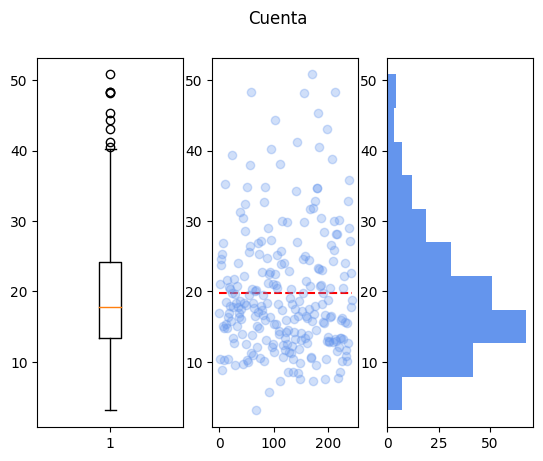

In [220]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
c="cornflowerblue"
fig.suptitle('Cuenta')
ax0.boxplot(tips['cuenta'].to_numpy())
ax1.hlines(y=tips["cuenta"].mean(),xmin=tips.index.min(),xmax=tips.index.max(),colors="red",linestyle="dashed")
ax1.plot(tips["cuenta"],color=c,marker = 'o', linestyle = '',alpha=0.3)
ax2.hist(tips["cuenta"],orientation=u'horizontal',color=c)
plt.show()
#tener en cuenta que no se marca la media, la marca es en el máximo del histograma, que es diferente que tips["cuenta"].max()

<img src="440px-Boxplot_vs_PDF.svg.png" ALIGN="left">

In [221]:
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cuenta      244 non-null    float64
 1   propina     244 non-null    float64
 2   sex         244 non-null    object 
 3   fumador     244 non-null    object 
 4   día         244 non-null    object 
 5   hora        244 non-null    object 
 6   tamaño      244 non-null    int64  
 7   col_vacia   244 non-null    float64
 8   col_random  244 non-null    float64
 9   total       244 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 19.2+ KB


### Covarianza

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, que mide el grado de variación conjunta de dos variables aleatorias.
Covarianza muestral

$$ Cov(X,Y)=\frac{\sum^{n}_{i=1}(x_i− \bar x )(y_i− \bar y)}{N−1} $$

donde $\bar x$ e $\bar y$ son la media de cada variable, y $x_i$ e $y_i$ son el valor de las variables para la observación i.

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación y poder hacer comparaciones consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación.

### Coeficientes de correlación lineal

Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta, con 0 tendríamos una asociación nula.
Existen varios tipos de correlación. La más conocida es, sin duda, la de Pearson. De hecho, si no decimos cuál estamos usando, se asume que usamos la de Pearson. Además de la de Pearson también tenemos la correlación de Spearman y la de Kendall.

In [222]:
#El método corr() de Pandas DataFrame se utiliza para calcular la matriz. 
#Por defecto, calcula el coeficiente de correlación de Pearson.
tips.corr() 

C:\Users\aldam\AppData\Local\Temp\ipykernel_10208\808042817.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,cuenta,propina,tamaño,col_vacia,col_random,total
cuenta,1.000000,0.675734,0.598315,NaN,0.026531,0.954002
propina,0.675734,1.000000,0.489299,NaN,0.021715,0.722002
tamaño,0.598315,0.489299,1.000000,NaN,0.002902,0.596148
col_vacia,NaN,NaN,NaN,NaN,NaN,NaN
col_random,0.026531,0.021715,0.002902,NaN,1.000000,0.019027
total,0.954002,0.722002,0.596148,NaN,0.019027,1.000000


C:\Users\aldam\AppData\Local\Temp\ipykernel_10208\701918434.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(tips.corr())


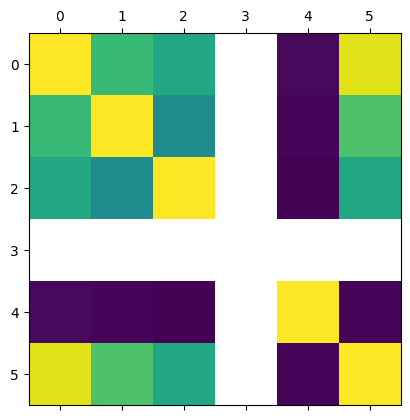

In [223]:
import matplotlib.pyplot as plt
plt.matshow(tips.corr())
plt.show()

C:\Users\aldam\AppData\Local\Temp\ipykernel_10208\1729292463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=tips.corr()
C:\Users\aldam\AppData\Local\Temp\ipykernel_10208\1729292463.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  im = ax.imshow(tips.corr(),cmap='RdBu')


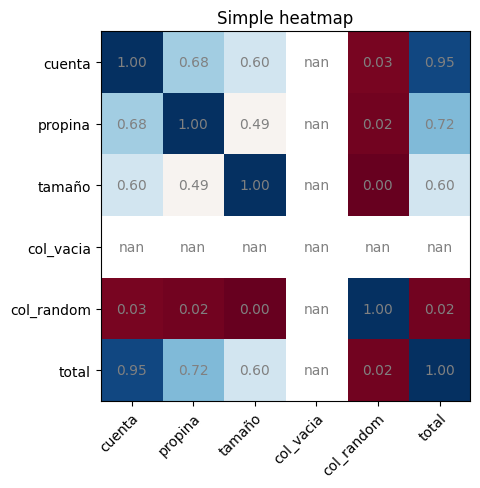

In [224]:
corr=tips.corr()

fig, ax = plt.subplots()
im = ax.imshow(tips.corr(),cmap='RdBu')

ax.set_xticks(np.arange(len(corr.columns.values)))
ax.set_xticklabels(corr.columns.values)
ax.set_yticks(np.arange(len(corr.columns.values)))
ax.set_yticklabels(corr.columns.values)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
txt="{:.2f}"
for i in range(len(corr.columns.values)):
    for j in range(len(corr.columns.values)):
        text = ax.text(j, i, txt.format(corr.to_numpy()[i][j]), ha="center", va="center", color="grey")

ax.set_title("Simple heatmap")
#fig.tight_layout()

plt.show()


## Obtener datos....

In [225]:
import pandas as pd

df = pd.read_excel('calendario.xlsx',index_col=0)  #no lea la columna 0
df

""


In [226]:
import pandas as pd

writer = pd.ExcelWriter('archivo.xlsx')

df.to_excel(writer, sheet_name="Enero", index=False)
df.to_excel(writer, sheet_name="Febrero", index=False)
writer.save()
writer.close()

C:\Users\aldam\AppData\Local\Temp\ipykernel_10208\1495281794.py:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [227]:
df_feb = pd.read_excel('archivo.xlsx',sheet_name="Febrero",index_col=0)  #no lea la columna 0
df_feb

""


In [228]:
#pip install odfpy


In [229]:
#SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df.to_sql('my_table',engine)

ModuleNotFoundError: No module named 'sqlalchemy'

In [ ]:
pd.read_sql('my_table',con = engine)

,index,Lunes,martes,miércoles,jueves,viernes,sábado
0,1,NaN,1,2,3,4,5
1,2,5.0,6,7,8,9,10
2,3,10.0,11,12,13,14,15
3,4,15.0,16,17,18,19,20
4,5,20.0,21,22,23,24,25
5,6,25.0,26,27,28,29,30


<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Lee el archivo "super.csv", haz que se muestren por pantalla los 10 primeros registros


In [ ]:
#¿Cuántos artículos de media se comprán? ¿Cuál es su precio?

archivo = pd.read_csv('super.csv')
print(archivo.head(10))

   número de artículos  precio    sexo        día
0                   27   42.15   Mujer     jueves
1                   26   60.26   Mujer     jueves
2                   20   28.12  Hombre  miércoles
3                   24   47.48  Hombre    domingo
4                   17   50.88   Mujer     sábado
5                   13   29.12   Mujer     sábado
6                   25   69.48  Hombre     sábado
7                   22   40.45   Mujer     sábado
8                   15   47.58   Mujer     sábado
9                   15   31.70   Mujer     sábado


In [ ]:
#¿Cuántos artículos de media se comprán?
#¿Cuál es su precio?
print(archivo['número de artículos'].mean())
print(archivo['precio'].mean())

20.667
41.659229999999994


número de artículos       AxesSubplot(0.125,0.11;0.227941x0.77)
precio                 AxesSubplot(0.398529,0.11;0.227941x0.77)
dtype: object

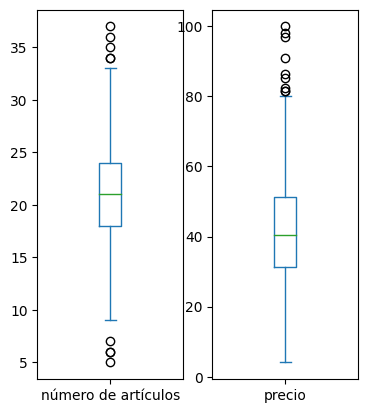

In [ ]:
#Muestra los diagramas de cajas
archivo.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)

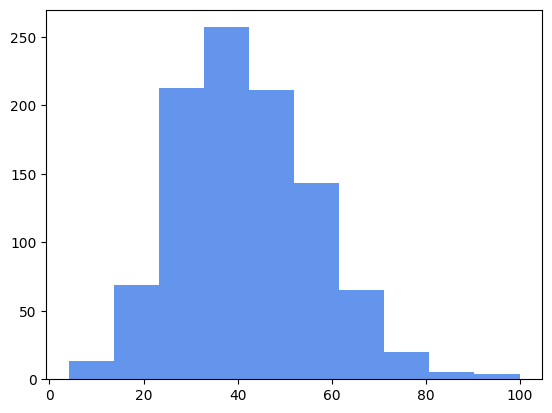

In [ ]:
#haz un histograma del precio
plt.hist(archivo['precio'],color='cornflowerblue')
plt.show()

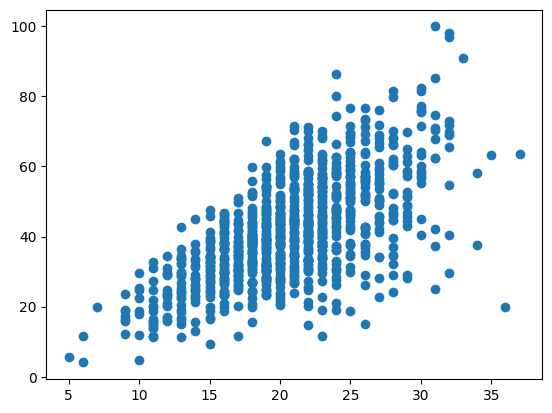

In [ ]:
#muestra un gráfico (scatter) del número de artículos respecto al precio

plt.scatter(archivo['número de artículos'],archivo['precio'])

In [ ]:
#Encuentra los registros que se han gastado más que la media, haz que salgan por pantalla los 5 primeros registros 
archivo[archivo['precio']>archivo['precio'].mean()].head()

,número de artículos,precio,sexo,día
0,27,42.15,Mujer,jueves
1,26,60.26,Mujer,jueves
3,24,47.48,Hombre,domingo
4,17,50.88,Mujer,sábado
6,25,69.48,Hombre,sábado


In [ ]:
#¿Cuántas compras se han hecho con un precio mayor de 50 €, por hombres y el lunes?
archivo[(archivo['precio']>50) & (archivo['sexo']=='Hombre') & (archivo['día']=='lunes')]

,número de artículos,precio,sexo,día
47,22,50.28,Hombre,lunes
126,23,55.97,Hombre,lunes
305,18,55.74,Hombre,lunes
380,24,86.26,Hombre,lunes
432,32,65.51,Hombre,lunes
433,24,57.55,Hombre,lunes
581,27,50.51,Hombre,lunes
647,25,53.50,Hombre,lunes
927,25,56.88,Hombre,lunes
928,26,55.30,Hombre,lunes


<AxesSubplot: xlabel='día'>

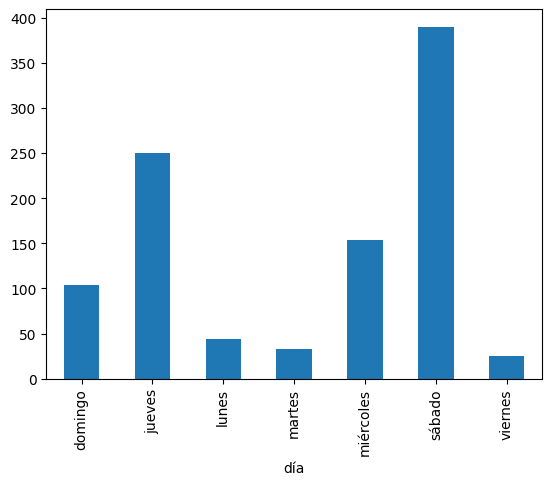

In [ ]:
#crea un histograma en que se muestren la distribución de las compras por días
archivo.groupby(['día'])['día'].count().plot(kind='bar')

In [ ]:
#crea una nueva columna en la que se muestre el valor medío de los artículos comprados, muestra los 5 primeros varlores
archivo['media'] = archivo['precio']/archivo['número de artículos']
archivo.head()

,número de artículos,precio,sexo,día,media
0,27,42.15,Mujer,jueves,1.561111
1,26,60.26,Mujer,jueves,2.317692
2,20,28.12,Hombre,miércoles,1.406000
3,24,47.48,Hombre,domingo,1.978333
4,17,50.88,Mujer,sábado,2.992941


(array([  9.,  26.,  88., 172., 224., 213., 157.,  79.,  25.,   7.]),
 array([0.481     , 0.79231667, 1.10363333, 1.41495   , 1.72626667,
        2.03758333, 2.3489    , 2.66021667, 2.97153333, 3.28285   ,
        3.59416667]),
 <BarContainer object of 10 artists>)

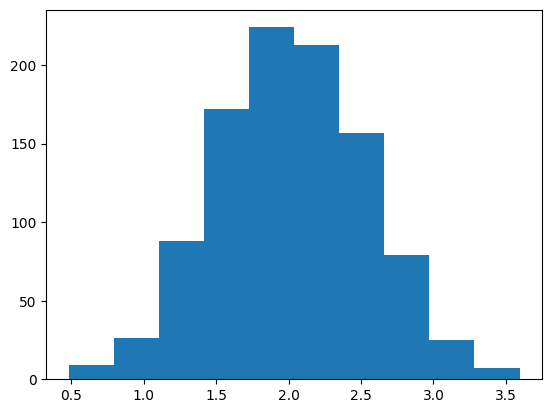

In [ ]:
#muestra un histograma del valor medio
plt.hist(archivo['media'])

In [ ]:
#cual es el valor medio

archivo['media'].mean()

2.018041543350072

Analiza la correlacción, obtinenes alguna conclusión.

C:\Users\aldam\AppData\Local\Temp\ipykernel_11288\3761330392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(archivo.corr())


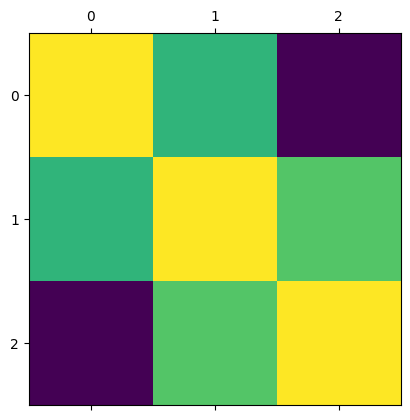

In [ ]:
plt.matshow(archivo.corr())
plt.show()

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Crea un archivo llamado calendario.xlsx. Haz que tenga 12 hojas, llamadas
["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
con los siguientes días por hoja
[31,28,31,30,31,30,31,31,30,31,30,31]
haz que apareza un calendario de ese mes en cada hoja como creas conveniente, es decir:

    L M X J V S D
    1 2 3 4 5 6 7
    ....
    
    o
    
    1 2 3 4 5 6 ....31
    
    o
    
    1
    2
    3
    4
    .
    .
    

In [ ]:
import pandas as pd
import openpyxl as opx

wb = opx.Workbook()
wb.save('calendario.xlsx')

months = ["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
days = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(len(months)):
    sheet = wb.create_sheet(months[i])

    sheet.cell(row=1, column=1).value = "L"
    sheet.cell(row=1, column=2).value = "M"
    sheet.cell(row=1, column=3).value = "X"
    sheet.cell(row=1, column=4).value = "J"
    sheet.cell(row=1, column=5).value = "V"
    sheet.cell(row=1, column=6).value = "S"
    sheet.cell(row=1, column=7).value = "D"

    day_counter = 1
    for row in range(2, 8):
        for col in range(1, 8):
            if (row > 2 and day_counter > days[i]):
                sheet.cell(row=row, column=col).value = ""
            else:
                sheet.cell(row=row, column=col).value = day_counter
                day_counter += 1
    wb.save("calendario.xlsx")


<hr>
<b><font color='red'>Ejercicio 03</font></b>  

Para extraer información financiera utilizaremos la libreria  yfinance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf

In [ ]:
from pytickersymbols import PyTickerSymbols
stock_data = PyTickerSymbols()
#Obtener los mercados
stock_data.get_all_indices()

['CDAX',
 'OMX Helsinki 25',
 'AEX',
 'NASDAQ 100',
 'DAX',
 'BEL 20',
 'FTSE 100',
 'SDAX',
 'TECDAX',
 'IBEX 35',
 'CAC 40',
 'CAC Mid 60',
 'S&P 500',
 'DOW JONES',
 'Switzerland 20',
 'S&P 600',
 'MDAX',
 'OMX Stockholm 30',
 'EURO STOXX 50',
 'S&P 100',
 'MOEX']

In [ ]:
ibex35_stocks = stock_data.get_stocks_by_index('IBEX 35')
#ver las empresas que cotizan en el mercado del ibex35
for i in list(ibex35_stocks):
    print(i['symbol'],i['name'])

IAG International Consolidated Airlines Group SA
MT ArcelorMittal
ANA Acciona SA
ACX Acerinox SA
ACS Actividades de ConstrucciÃ³n y Servicios SA
AENA Aena SA
AMS Amadeus IT Group SA
BBVA Banco Bilbao Vizcaya Argentaria SA
BKT Bankinter SA
CABK CaixaBank SA
CLNX Cellnex Telecom SA
ELE Endesa SA
FER Ferrovial SA
GRF Grifols SA
IBE Iberdrola SA
ITX Industria de DiseÃ±o Textil SA
IDR Indra Sistemas SA
COL Inmobiliaria Colonial, SOCIMI SA
MEL MeliÃ¡ Hotels International
MRL MERLIN Properties SOCIMI SA
NTGY Naturgy Energy Group SA
REE Red ElÃ©ctrica CorporaciÃ³n SA
REP Repsol SA
SGRE Siemens Gamesa Renewable Energy SA
TEF TelefÃ³nica
SAB Banco de Sabadell, S.A.
SAN Banco Santander, S.A.
ENG EnagÃ¡s, S.A.
FDR Fluidra
MAP Mapfre, S.A.
PHM Pharma Mar S.A.
SLR Solar power in Spain
ROVI Laboratorios Rovi


In [234]:
#Si queremos los calores de CaixaBanck
start='2021-01-01'
end='2021-06-01'
df =  yf.download('CABK',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1.05,1.05,1.05,1.05,1.05,0
2021-01-05,1.03,1.05,1.03,1.05,1.05,25651
2021-01-06,1.04,1.05,1.04,1.05,1.05,7640
2021-01-07,1.05,1.05,1.04,1.04,1.04,19040
2021-01-11,1.04,1.04,1.02,1.04,1.04,52270


Crea una nueva columna llamada que muestre el valor medio, es decir (Close+Open)/2 y haz una gráfica que muestre los tres valores:

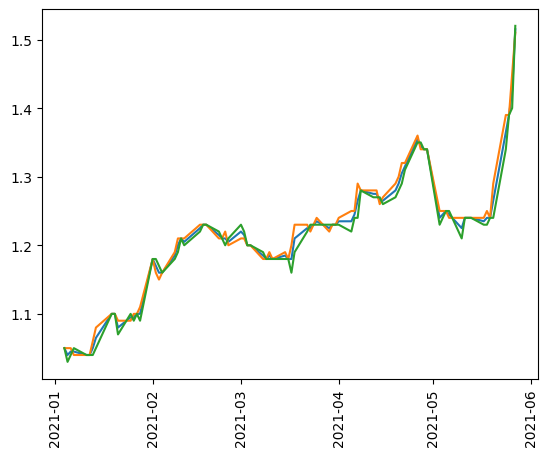

In [235]:
df['valor medio'] = (df['Open']+df['Close'])/2
plt.plot(df['valor medio'])
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.xticks(rotation=90)
plt.show()


<img src="PAND1.png">  

Utiliza, hlines, fill_between de la libreria matplotlib para obtener el siguiente resultado:

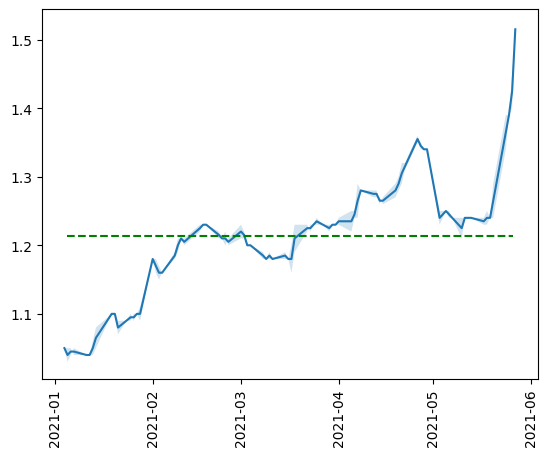

In [236]:
plt.plot(df['valor medio'])
y1 = df['Close']
y2 = df['Open']
plt.fill_between(df.index, y1, y2, alpha=0.2, interpolate=True)
plt.axhline(y=df['valor medio'].mean(), xmin= 0.05, xmax=0.95, color='g', linestyle='--')
plt.xticks(rotation=90)
plt.show()

<img src="PAND2.png">  

crea una nueva gráfica en la que se muestre la diferencia entre la apertura y el cierre, así como la media 

(array([18628., 18659., 18687., 18718., 18748., 18779.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06')])

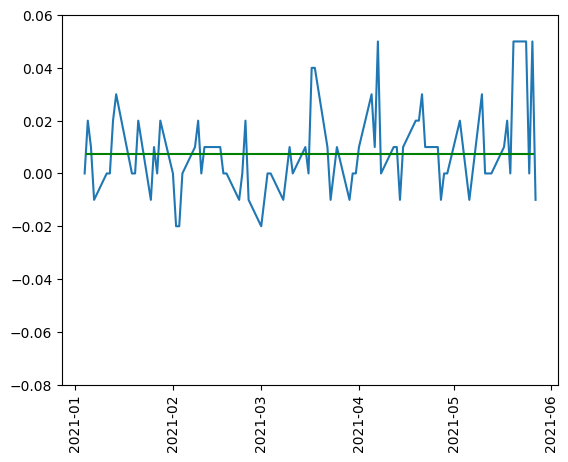

In [270]:
df['diff'] = df['Close'] - df['Open']
mean = df['diff'].mean()
plt.plot(df['diff'])
plt.axhline(mean, xmin=0.05, xmax=0.95, color='g')
plt.ylim(-0.08, 0.06)
plt.xticks(rotation=90)

<img src="PAND3.png">

In [ ]:
#fíjate, si tomamos la media de los valeres de TEL
df =  yf.download('TEL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,121.190002,122.410004,118.980003,120.300003,116.700813,1386500
2021-01-05 00:00:00-05:00,120.669998,122.849998,120.389999,122.610001,118.941696,1191400
2021-01-06 00:00:00-05:00,125.000000,127.889999,124.449997,126.129997,122.356377,2306100
2021-01-07 00:00:00-05:00,127.160004,129.470001,126.800003,128.660004,124.810692,1875000
2021-01-08 00:00:00-05:00,129.889999,131.750000,128.240005,130.470001,126.566551,2301300


<img src="PAND4.png">

In [276]:
#Si creamos un nuevo df y metemos los vaores medios de TEL
df['TEL']=(df['Close']+df['Open'])/2
df_ibex35=pd.DataFrame(df['TEL'])
df_ibex35.head()

,TEL
Date,
2021-01-04,1.050
2021-01-05,1.040
2021-01-06,1.045
2021-01-07,1.045
2021-01-11,1.040


In [277]:
#ahora metemos los de AENA
df =  yf.download('CABK',start,end)
df.head()
df['CABK']=(df['Close']+df['Open'])/2
df_ibex35['CABK']=df['CABK']
df_ibex35.head()

[*********************100%***********************]  1 of 1 completed


,TEL,CABK
Date,,
2021-01-04,1.050,1.050
2021-01-05,1.040,1.040
2021-01-06,1.045,1.045
2021-01-07,1.045,1.045
2021-01-11,1.040,1.040


In [287]:
#Haz que se descarque los valores de la siguiente lista 
lista=['IAG', 'MT', 'AMS', 'BBVA', 'BKT', 'TEF', 'SAN', 'ENG']
#Haz que los guarde dentro de una dataframe llamado lista_ibex35
lista_ibex35=pd.DataFrame()
for i in lista:
    df = yf.download(i, start, end)
    df[i]=(df['Close']+df['Open'])/2
    lista_ibex35[i]=df[i]
lista_ibex35.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IAG,MT,AMS,BBVA,BKT,TEF,SAN,ENG
Date,,,,,,,,
2021-01-04,3.89,24.280001,2.180,4.970,18.240000,4.095,3.095,3.020
2021-01-05,3.85,24.265000,2.160,4.990,18.224999,4.110,3.120,2.875
2021-01-06,3.70,24.655001,2.165,5.270,18.195000,4.330,3.335,2.980
2021-01-07,3.70,25.385000,2.200,5.305,18.165000,4.420,3.350,4.190
2021-01-08,3.56,24.860000,2.220,5.265,18.180000,4.430,3.360,4.910


<AxesSubplot: xlabel='Date'>

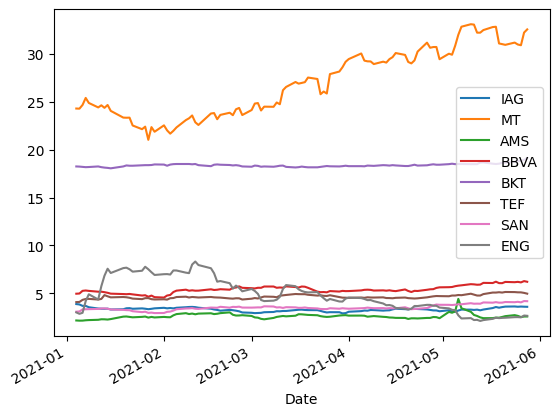

In [288]:
#Visualizalo descomentando la siguiente instrucción
lista_ibex35.plot()

Ejemplo de salida:

<img src="PAND5.png">  

<AxesSubplot: >

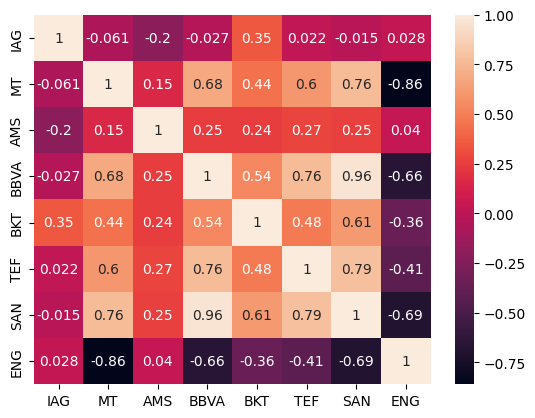

In [289]:
#Crea un gráfico de la correlación descomentando la siguiente instrucción
sns.heatmap(lista_ibex35.corr(), annot = True)

<img src="PAND6.png">

Reponde a la siguientes preguntas:
- ¿Cuáles son las empresas que estan más correlaccionadas?
- ¿Cuál crees que es el motivo?